# Mid-Boot-Camp-Project

Questions to be answered:

    1 : Does Netflix has more focus on TV Shows than movies (Ratio of movies to TV Serials). 
    
    2 : Understanding what content is available in different countries.
    
    3 : Understanding which countries have most content released and yearly analysis.
    
    3 : TV-Shows with maximum seasons.
    
    4 : What is the maximum duration of movies in Netflix ? 
    
    

Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Exploring and cleaning the data.


In [2]:
df = pd.read_csv(r"..\data\netflix_titles.csv")
#df = pd.read_csv(r"C:\Users\akki2\OneDrive\Documents\Ironhack\Week_5\Mid_bootcamp_project\data\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.shape

(8807, 12)

In [6]:
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#As we can see that there are NaN values in director, cast, country, date added, grade and duration.
#The variables director,cast will be dumped because they will create further NaN values in other variabes if taken into consideration. 
#The main variable here is the country because that can give many other analysis. 
#The other variables we can get rid of the null variables in them. 

#One more thing to consider is that listed_in is basically genre of the content and it needs to be split to show one genre per content.
But when the genre has split using the lambda function it can create unwanted NaN values in country column but that can be managed. This can affect the overall efficieny of the model. 

In [8]:
#df['listed_in'] = df['listed_in'].apply(lambda x: x.split(",")[0])
#df['listed_in'].head(10)

In [9]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [10]:
#df['director'] = df['director'].fillna('NoData')

In [11]:
#df['cast'] = df['cast'].fillna('NoData')

In [12]:
df.drop(['cast','director'],axis='columns',inplace=True)

In [13]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [14]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [15]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [16]:
df = df.dropna( how='any',subset=['duration'])

In [17]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
df.duplicated().sum()

0

# Adding few columns for better understanding the column 'rating'

In [19]:
df['date_added']= pd.to_datetime(df['date_added'])

In [20]:
df.dtypes

show_id                 object
type                    object
title                   object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [21]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [22]:
#df['year'] = pd.DatetimeIndex(df['date_added']).year
#df['month'] = pd.DatetimeIndex(df['date_added']).month
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

In [23]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8803,s8804,TV Show,Zombie Dumb,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1


# ratio of movies vs TV_Shows

Text(0.5, 1.0, 'Ratio of Movie/TV Show')

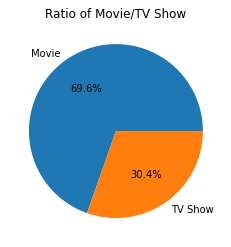

In [24]:
plt.pie(df['type'].value_counts(), labels = df['type'].value_counts().index, autopct="%.1f%%")
plt.title('Ratio of Movie/TV Show')

Clearly, Netflix has more number of movies than TV-Shows

In [25]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['rating'] = df['rating'].replace(ratings_ages)


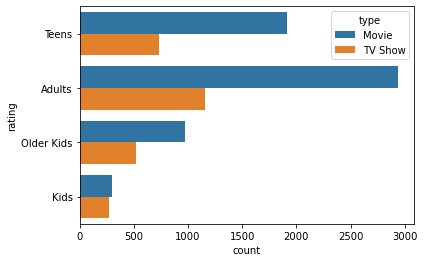

In [26]:
sns.countplot(data=df , y='rating' , hue = 'type')
plt.show()

Converted the ages ratings into readable data and it shows Netflix has high numbers of Adult rating movies and TV-Shows.

<Figure size 1440x1080 with 0 Axes>

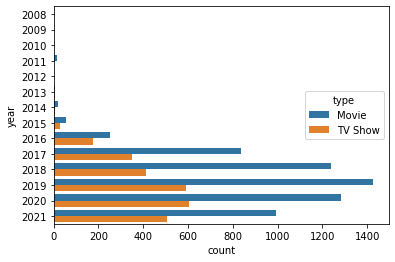

<Figure size 1440x1080 with 0 Axes>

In [27]:
sns.countplot(data=df , y='year' , hue = 'type')
plt.figure(figsize=(20,15))

Over here wanted to see how many movies and TV-Shows were available in the following years mentioned. Please this is not the release_year of the content but when they were added. 

<Figure size 1440x1080 with 0 Axes>

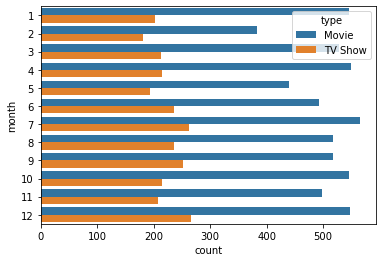

<Figure size 1440x1080 with 0 Axes>

In [28]:
sns.countplot(data=df , y='month' , hue = 'type')
plt.figure(figsize=(20,15))

We can see that year 2019 was the year with the highest amount of movies but 2020 was the year with the highest number of TV-Serials.
Also, we can see each month number of movies is higher than TV-Serials

# Understanding which countries have most content released.

<AxesSubplot:xlabel='country', ylabel='count'>

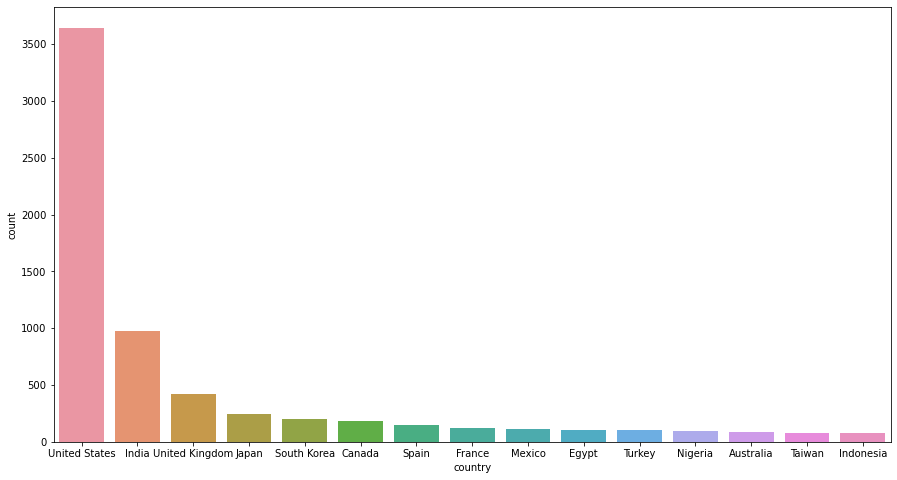

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x="country", data=df, order=df['country'].value_counts().index[0:15])

# Understanding the yearly analysis of the content of Netflix 

<AxesSubplot:xlabel='count', ylabel='release_year'>

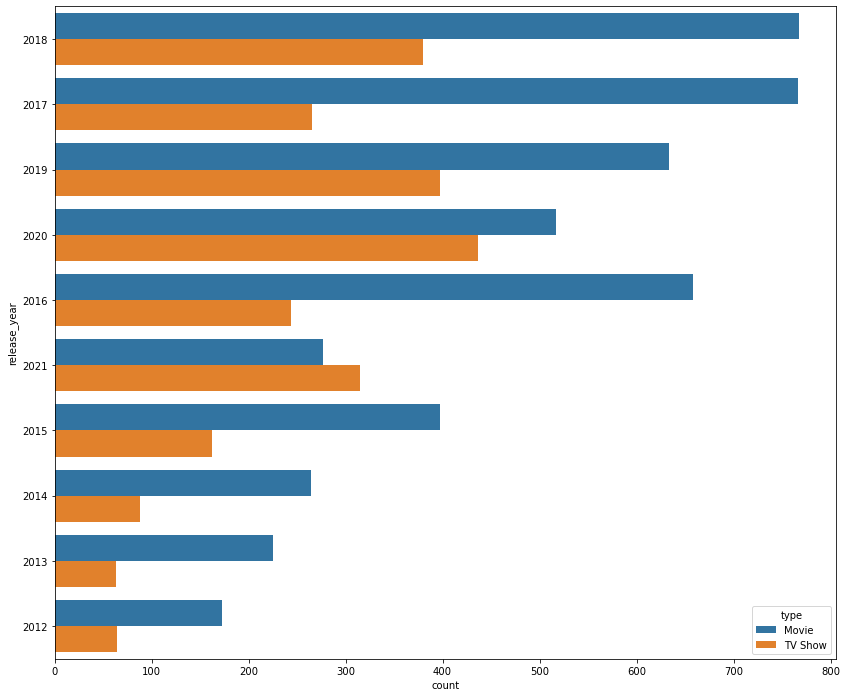

In [30]:
plt.figure(figsize=(14,12))
sns.countplot(y="release_year",data = df, order= df['release_year'].value_counts().index[0:10],hue =df['type'])

# Understanding what content is available in different countries.

Applying another filter here to get one genre per content category.  

In [31]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(",")[0])
df['listed_in'].head(10)

0               Documentaries
1      International TV Shows
2              Crime TV Shows
3                  Docuseries
4      International TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
9                    Comedies
Name: listed_in, dtype: object

In [32]:
cols = ['listed_in','country']
gen_country = df[cols]
gen_country.head(10)

,listed_in,country
0,Documentaries,United States
1,International TV Shows,South Africa
2,Crime TV Shows,United States
3,Docuseries,United States
4,International TV Shows,India
5,TV Dramas,United States
6,Children & Family Movies,United States
7,Dramas,"United States, Ghana, Burkina Faso, United Kin..."
8,British TV Shows,United Kingdom
9,Comedies,United States


#understanding most popular genre on Netflix

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Dramas'),
  Text(1, 0, 'Comedies'),
  Text(2, 0, 'Action & Adventure'),
  Text(3, 0, 'Documentaries'),
  Text(4, 0, 'International TV Shows'),
  Text(5, 0, 'Children & Family Movies'),
  Text(6, 0, 'Crime TV Shows'),
  Text(7, 0, "Kids' TV"),
  Text(8, 0, 'Stand-Up Comedy'),
  Text(9, 0, 'Horror Movies'),
  Text(10, 0, 'British TV Shows'),
  Text(11, 0, 'Docuseries'),
  Text(12, 0, 'Anime Series'),
  Text(13, 0, 'International Movies'),
  Text(14, 0, 'TV Comedies')])

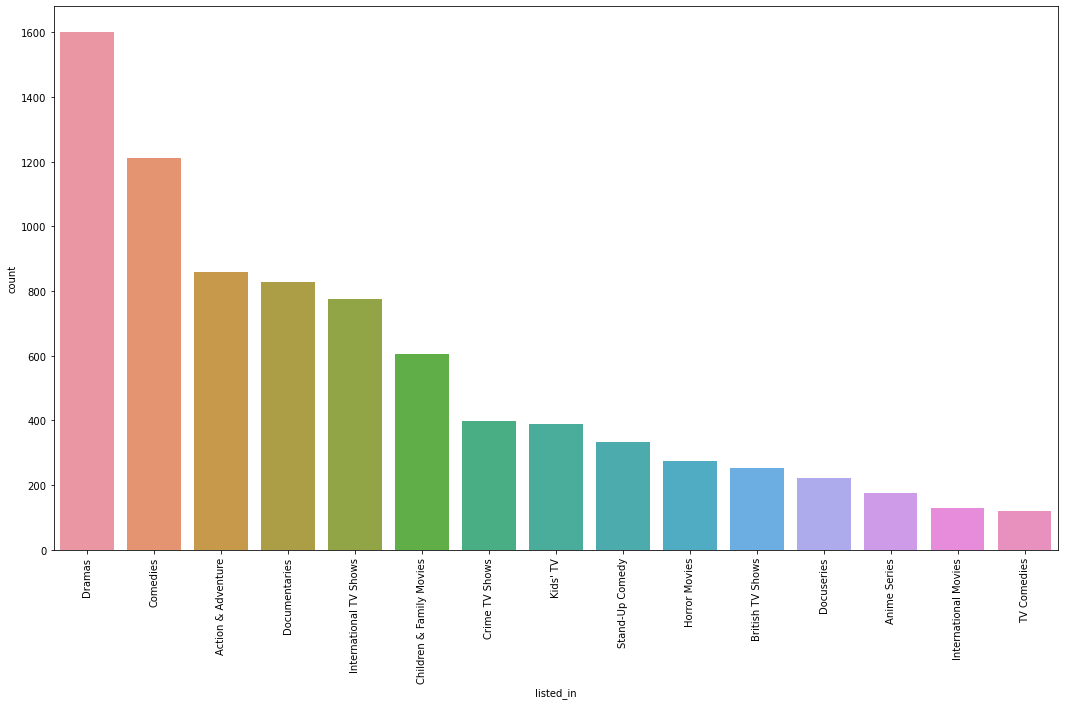

In [33]:
plt.figure(figsize=(18,10))
sns.countplot(x="listed_in", data=df, order=df['listed_in'].value_counts().index[0:15])
plt.xticks(rotation =90)

The best 'listed_in'(genre) column is 'Dramas' 

Seperating the main data frame into two new dataframes to find which genre is best in movies and tv shows seperately. 

In [34]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [35]:
tv_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year,month
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,Adults,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,United States,2021-09-24,2021,Adults,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,Adults,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,Adults,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,United States,2021-09-24,2021,Adults,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9


In [36]:
movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,United States,2021-09-24,2021,Older Kids,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,Adults,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,United States,2021-09-24,2021,Teens,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,Adults,127 min,Dramas,After most of her family is murdered in a terr...,2021,9


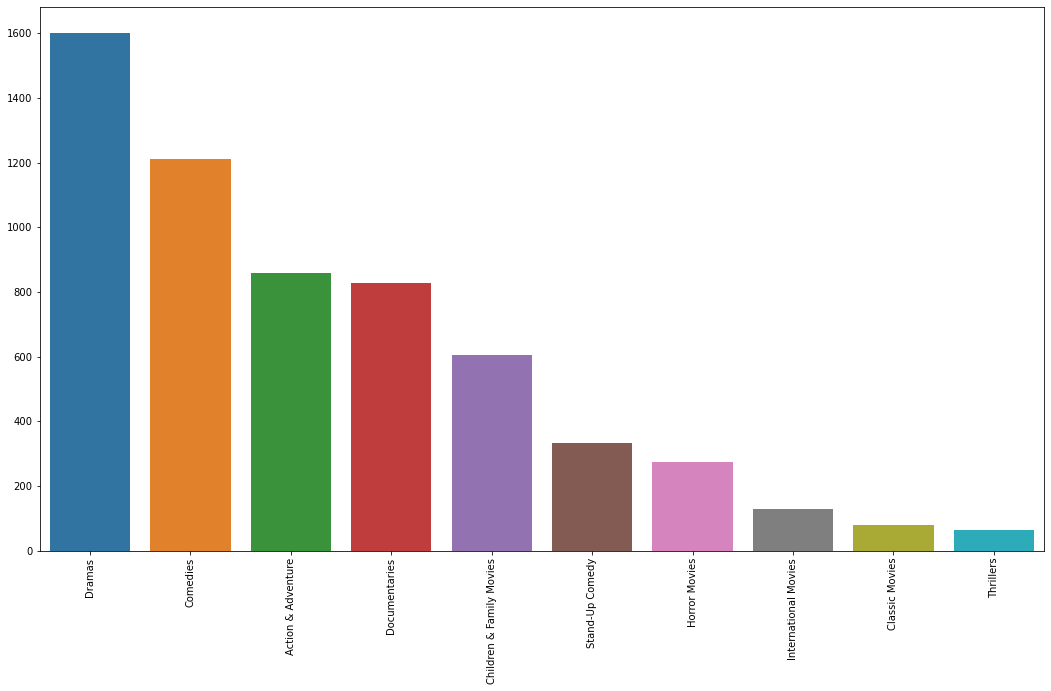

In [37]:
plt.figure(figsize=(18,10))
sns.barplot(x = movie_df["listed_in"].value_counts().head(10).index,
            y = movie_df["listed_in"].value_counts().head(10).values)
plt.xticks(rotation=90)

plt.show()

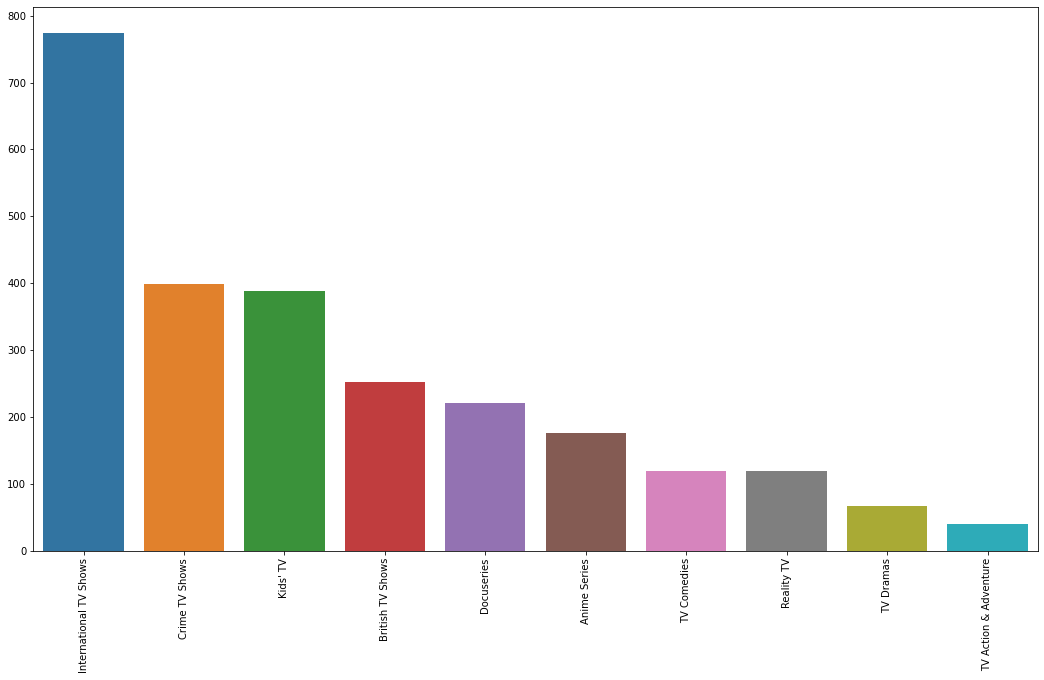

In [38]:
plt.figure(figsize=(18,10))
sns.barplot(x = tv_df["listed_in"].value_counts().head(10).index,
            y = tv_df["listed_in"].value_counts().head(10).values)
plt.xticks(rotation=90)

plt.show()

# TV-Shows with the highest numbers of seasons 

In [39]:
columns = ['title', 'duration']
tv_shows = tv_df[columns]


In [40]:
tv_shows = tv_df.sort_values(by = 'duration', ascending = False)
tv_shows.head(10)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year,month
1480,s1481,TV Show,Still Game,United Kingdom,2020-12-30,2018,Teens,9 Seasons,British TV Shows,Scottish pensioners Jack and Victor make the m...,2020,12
6504,s6505,TV Show,Club Friday The Series 6,United States,2019-03-09,2015,Adults,9 Seasons,International TV Shows,Based on a Thai radio show that gives love adv...,2019,3
67,s68,TV Show,Saved by the Bell,United States,2021-09-15,1994,Older Kids,9 Seasons,Kids' TV,"From middle school to college, best friends Za...",2021,9
1998,s1999,TV Show,Call the Midwife,United Kingdom,2020-09-15,2020,Adults,9 Seasons,British TV Shows,This period drama set in impoverished East Lon...,2020,9
8,s9,TV Show,The Great British Baking Show,United Kingdom,2021-09-24,2021,Teens,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,9
8442,s8443,TV Show,The Office (U.S.),United States,2016-01-01,2012,Teens,9 Seasons,TV Comedies,This hit comedy chronicles the foibles of disg...,2016,1
5803,s5804,TV Show,Forensic Files,United States,2016-09-01,2011,Adults,9 Seasons,Crime TV Shows,Detectives and crime lab technicians use the l...,2016,9
3541,s3542,TV Show,Naruto,Japan,2019-09-01,2006,Teens,9 Seasons,Anime Series,"Guided by the spirit demon within him, orphane...",2019,9
1701,s1702,TV Show,American Horror Story,United States,2020-11-13,2019,Adults,9 Seasons,TV Horror,This twisted Emmy-winning drama plays upon the...,2020,11
1933,s1934,TV Show,Wentworth,Australia,2020-09-30,2020,Adults,8 Seasons,Crime TV Shows,Bea Smith is locked up while awaiting trial fo...,2020,9


In [41]:
tv_df.dtypes

show_id                 object
type                    object
title                   object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year                     int64
month                    int64
dtype: object

In [42]:
tv_df['duration'] = tv_df['duration'].str.replace('Seasons', '')
tv_df['duration'] = tv_df['duration'].str.replace('Season','')
tv_df['duration'] = tv_df['duration'].str.replace('Seaon','')
tv_df['duration']

C:\Users\akki2\AppData\Local\Temp\ipykernel_59824\2561601187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration'] = tv_df['duration'].str.replace('Seasons', '')
C:\Users\akki2\AppData\Local\Temp\ipykernel_59824\2561601187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration'] = tv_df['duration'].str.replace('Season','')
C:\Users\akki2\AppData\Local\Temp\ipykernel_59824\2561601187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

1       2 
2       1 
3       1 
4       2 
5       1 
        ..
8795    2 
8796    2 
8797    3 
8800    1 
8803    2 
Name: duration, Length: 2676, dtype: object

In [43]:
tv_df['duration']=tv_df['duration'].astype(str).astype(int)

C:\Users\akki2\AppData\Local\Temp\ipykernel_59824\3375197163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration']=tv_df['duration'].astype(str).astype(int)


In [44]:
tv_df['duration']

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2676, dtype: int32

In [45]:
columns=['title','duration']
tv_shows = tv_df[columns]

In [46]:
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top10 = tv_shows[0:10]
top10

,title,duration
548,Grey's Anatomy,17
2423,Supernatural,15
4798,NCIS,15
1354,Heartland,13
4220,COMEDIANS of the world,13
7847,Red vs. Blue,13
4964,Trailer Park Boys,12
5412,Criminal Minds,12
6795,Frasier,11
6456,Cheers,11


<AxesSubplot:xlabel='title'>

<Figure size 720x432 with 0 Axes>

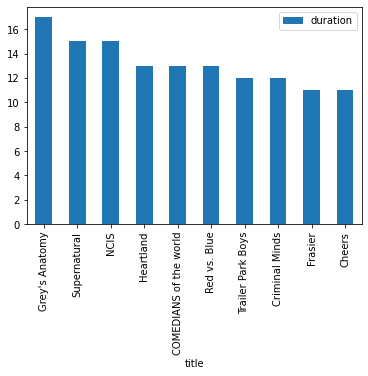

In [47]:
plt.figure(figsize=(10,6))
top10.plot(kind='bar',x='title',y='duration')

#  What is the maximum duration of movies in Netflix ?

In [48]:
movie_df['duration']=movie_df['duration'].str.replace('min','')
movie_df['duration']

C:\Users\akki2\AppData\Local\Temp\ipykernel_59824\1588359753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration']=movie_df['duration'].str.replace('min','')


0        90 
6        91 
7       125 
9       104 
12      127 
        ... 
8801     96 
8802    158 
8804     88 
8805     88 
8806    111 
Name: duration, Length: 6128, dtype: object

In [49]:
movie_df['duration']=movie_df['duration'].astype(str).astype(int)

C:\Users\akki2\AppData\Local\Temp\ipykernel_59824\773198234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration']=movie_df['duration'].astype(str).astype(int)


In [50]:
movie_df['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int32

<AxesSubplot:xlabel='duration', ylabel='Density'>

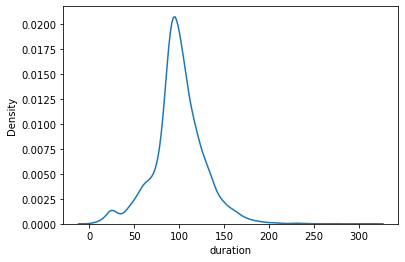

In [51]:
sns.kdeplot(movie_df['duration'])

As you see, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting

Hope you liked the analysis! 